| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

## Nama : Aulia Khoirun Nisa
## NIM : A12.2020.06400

# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    
    # Autentikasi dan akses menggunakan keys
    auth = tweepy.OAuthHandler("qLBifNyB530S3n6mLdkmhhjzR","53ni8xiFHnFPd4EMDP0tGjlGw0nC8yIaL5P5wWSHhwbHNABi0j")
    auth.set_access_token("1575101006647795714-XHnmBKYXA0NY6HcboI6GY20pOBN81V","QvvL0VAXKZasf6F6TPdwrtR5bKELJ1HkUvZj3hTqUjUgB")
    
    # Kembalikan akses ke API
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username
username yang saya gunakan yaitu @radenrauf

In [4]:
tweets = extractor.user_timeline(screen_name="radenrauf", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 100.

5 tweet teratas:

Tebak Lokasi https://t.co/3sRj9DLr9l

Udah akhir Oktober aja.
Terima kasih ya Oktober atas warna warninya, berasa banget asli.

Pengen gitu sekali kali mau tidur pikiran tenang.
Tapi mana bisaa, selalu aja pikiran kemana manaa.

Kadang kadang Healing tak perlu liburan ke tempat yang jauh, hanya butuh istirahat sejenak, rebahan tanpa mengkhawa… https://t.co/Ls7RBQUUBM

BESOK SENIN



## Memasukkan ke dataframe pandas

In [5]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(10))

,Tweets
0,Tebak Lokasi https://t.co/3sRj9DLr9l
1,Udah akhir Oktober aja.\nTerima kasih ya Oktob...
2,Pengen gitu sekali kali mau tidur pikiran tena...
3,Kadang kadang Healing tak perlu liburan ke tem...
4,BESOK SENIN
5,RT @sweat1308: @radenrauf Kesayangam ku https:...
6,RT @ichankuu: @radenrauf Ini kesayangan ku si ...
7,Sunmori sama kesayangan dulu. \nIni kesayangan...
8,Turut berduka atas Tragedi Itaewon :(((
9,Gimana Malam Minggunya?\nHappy?\nSad?\nComplic...


In [6]:
dataset.to_csv('dataset_radenrauf.csv')

## Menetukan sentimen pada tweet

In [8]:
! pip install textblob 

In [9]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [10]:
  # Autentikasi dan akses menggunakan keys
auth = tweepy.OAuthHandler("qLBifNyB530S3n6mLdkmhhjzR","53ni8xiFHnFPd4EMDP0tGjlGw0nC8yIaL5P5wWSHhwbHNABi0j")
auth.set_access_token("1575101006647795714-XHnmBKYXA0NY6HcboI6GY20pOBN81V","QvvL0VAXKZasf6F6TPdwrtR5bKELJ1HkUvZj3hTqUjUgB")
api = tw.API(auth)
    
hasilsearch = api.search_tweets(q="radenrauf",lang="id",count=100) 

In [11]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet.created_at
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["Tweet"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)
        

Iya berasa bgt patah hatinya kak
'list' object has no attribute 'strip'
Makasih yaa semua nyaa senanggg sekalii akuu
'list' object has no attribute 'strip'
Oktober yang berantakan
'list' object has no attribute 'strip'
parkiran
'list' object has no attribute 'strip'
Parkiran
'list' object has no attribute 'strip'
Terima kasih Oktober Selalu semangat untuk menyebarkan lamaran kerja dan flyer les bahasa Inggris ku
'list' object has no attribute 'strip'
RT Tebak Lokasi
'list' object has no attribute 'strip'
bojong sari
'list' object has no attribute 'strip'
yang akhir bulan malah sakit cung
'list' object has no attribute 'strip'
RT Badai hujan angin puting beliungnya dapet semua di oktober
'list' object has no attribute 'strip'
Ngapain Makan bakso
'list' object has no attribute 'strip'
Oktober yg indah buatku
'list' object has no attribute 'strip'
Terima kasih Oktober walaupun warna nya kebanyakan hitamnya
'list' object has no attribute 'strip'
Fix parkiran mobil
'list' object has no attr

In [12]:
df = pd.DataFrame(hasilanalisis) #convert ke data pandas dataframe
df

,tanggal_tweet,pengguna,Tweet,sentimen
0,2022-10-31 03:52:27+00:00,kholismlna,@radenrauf Iya berasa bgt patah hatinya kak😢,0
1,2022-10-31 03:49:39+00:00,itpeso,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0
2,2022-10-31 03:45:59+00:00,Viravirrr16,@radenrauf Oktober yang berantakan !,0
3,2022-10-31 03:43:54+00:00,dwyaaay,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0
4,2022-10-31 03:40:42+00:00,missemha05,@radenrauf Parkiran 🤪,0
...,...,...,...,...
95,2022-10-31 01:40:32+00:00,imazkyo,@radenrauf Tunggu ya bntr lagi nyusul https://...,0
96,2022-10-31 01:39:32+00:00,xxxkoso1,@itpeso @radenrauf selamat bertambah usia kaka...,0
97,2022-10-31 01:36:36+00:00,danoesetiantos,@radenrauf parkiran,0
98,2022-10-31 01:35:46+00:00,el_queensha,@radenrauf Insya Allah ...salam sehat slalu ...,0


In [13]:
df.to_csv('Dataset_Sentimen.csv') #simpan pandas dataframe ke csv file

# Load dataset mentah - lihat skema klasifikasi

In [14]:
df = pd.read_csv('Dataset_Sentimen.csv')

# Preprocessing Tahap 00

In [15]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['tanggal_tweet'], axis=1)
df = df.drop(['pengguna'], axis=1)

## cek info

In [16]:
df.head()

,Tweet,sentimen
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0
2,@radenrauf Oktober yang berantakan !,0
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0
4,@radenrauf Parkiran 🤪,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [18]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\acer\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\acer\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan

Deklarasikan sesuai kebutuhan

In [20]:
#Contoh
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

In [21]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [22]:
final_string = []
for text in df['Tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [23]:
df["step01"] = final_string

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [24]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Tweet,sentimen,step01
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0,user iya berasa bgt patah hatinya kak
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0,user makasih yaa semua nyaa senanggg sekalii akuu
2,@radenrauf Oktober yang berantakan !,0,user oktober yang berantakan
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0,user parkiran co38fjt8917i cot2eb2dywmr
4,@radenrauf Parkiran 🤪,0,user parkiran
5,@radenrauf Terima kasih Oktober... Selalu sema...,0,user terima kasih oktober selalu semangat untu...
6,RT @radenrauf: Tebak Lokasi https://t.co/3sRj9...,0,rt user tebak lokasi co3srj9dlr9l
7,@radenrauf bojong sari,0,user bojong sari
8,"@radenrauf yang akhir bulan malah sakit, cung",0,user yang akhir bulan malah sakit cung
9,RT @cip833: @radenrauf Badai hujan angin putin...,0,rt user user badai hujan angin puting beliungn...


## Hapus data kosong

In [25]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [26]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     0 non-null      object
 1   sentimen  0 non-null      int64 
 2   step01    0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


In [27]:
df_hapus.head(10)

,Tweet,sentimen,step01


In [28]:
df_new = df[~df.isin(df_hapus)].dropna()

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
 2   step01    100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [30]:
df_new

,Tweet,sentimen,step01
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0,user iya berasa bgt patah hatinya kak
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0,user makasih yaa semua nyaa senanggg sekalii akuu
2,@radenrauf Oktober yang berantakan !,0,user oktober yang berantakan
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0,user parkiran co38fjt8917i cot2eb2dywmr
4,@radenrauf Parkiran 🤪,0,user parkiran
...,...,...,...
95,@radenrauf Tunggu ya bntr lagi nyusul https://...,0,user tunggu ya bntr lagi nyusul cocib0gcrfwa
96,@itpeso @radenrauf selamat bertambah usia kaka...,0,user user selamat bertambah usia kaka cantik f...
97,@radenrauf parkiran,0,user parkiran
98,@radenrauf Insya Allah ...salam sehat slalu ...,0,user insya allah salam sehat slalu


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [31]:
## Bisa menggunakan nltk 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [33]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [34]:
df_new.head(10)

,Tweet,sentimen,step01,tokens
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0,user iya berasa bgt patah hatinya kak,"[user, iya, berasa, bgt, patah, hatinya, kak]"
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0,user makasih yaa semua nyaa senanggg sekalii akuu,"[user, makasih, yaa, semua, nyaa, senanggg, se..."
2,@radenrauf Oktober yang berantakan !,0,user oktober yang berantakan,"[user, oktober, yang, berantakan]"
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0,user parkiran co38fjt8917i cot2eb2dywmr,"[user, parkiran, co38fjt8917i, cot2eb2dywmr]"
4,@radenrauf Parkiran 🤪,0,user parkiran,"[user, parkiran]"
5,@radenrauf Terima kasih Oktober... Selalu sema...,0,user terima kasih oktober selalu semangat untu...,"[user, terima, kasih, oktober, selalu, semanga..."
6,RT @radenrauf: Tebak Lokasi https://t.co/3sRj9...,0,rt user tebak lokasi co3srj9dlr9l,"[rt, user, tebak, lokasi, co3srj9dlr9l]"
7,@radenrauf bojong sari,0,user bojong sari,"[user, bojong, sari]"
8,"@radenrauf yang akhir bulan malah sakit, cung",0,user yang akhir bulan malah sakit cung,"[user, yang, akhir, bulan, malah, sakit, cung]"
9,RT @cip833: @radenrauf Badai hujan angin putin...,0,rt user user badai hujan angin puting beliungn...,"[rt, user, user, badai, hujan, angin, puting, ..."


In [35]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [36]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [37]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [38]:
df_new["step02"] = final_string_tokens

In [39]:
#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [40]:
df_new.head(10)

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0,user iya berasa bgt patah hatinya kak,"[user, iya, berasa, bgt, patah, hatinya, kak]","[user, iya, berasa, banget, patah, hatinya, kak]",user iya berasa banget patah hatinya kak
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0,user makasih yaa semua nyaa senanggg sekalii akuu,"[user, makasih, yaa, semua, nyaa, senanggg, se...","[user, makasih, iya, semua, nyaa, senanggg, se...",user makasih iya semua nyaa senanggg sekalii akuu
2,@radenrauf Oktober yang berantakan !,0,user oktober yang berantakan,"[user, oktober, yang, berantakan]","[user, oktober, yang, berantakan]",user oktober yang berantakan
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0,user parkiran co38fjt8917i cot2eb2dywmr,"[user, parkiran, co38fjt8917i, cot2eb2dywmr]","[user, parkiran, co38fjt8917i, cot2eb2dywmr]",user parkiran co38fjt8917i cot2eb2dywmr
4,@radenrauf Parkiran 🤪,0,user parkiran,"[user, parkiran]","[user, parkiran]",user parkiran
5,@radenrauf Terima kasih Oktober... Selalu sema...,0,user terima kasih oktober selalu semangat untu...,"[user, terima, kasih, oktober, selalu, semanga...","[user, terima, kasih, oktober, selalu, semanga...",user terima kasih oktober selalu semangat untu...
6,RT @radenrauf: Tebak Lokasi https://t.co/3sRj9...,0,rt user tebak lokasi co3srj9dlr9l,"[rt, user, tebak, lokasi, co3srj9dlr9l]","[rt, user, tebak, lokasi, co3srj9dlr9l]",rt user tebak lokasi co3srj9dlr9l
7,@radenrauf bojong sari,0,user bojong sari,"[user, bojong, sari]","[user, bojong, sari]",user bojong sari
8,"@radenrauf yang akhir bulan malah sakit, cung",0,user yang akhir bulan malah sakit cung,"[user, yang, akhir, bulan, malah, sakit, cung]","[user, yang, akhir, bulan, malah, sakit, cung]",user yang akhir bulan malah sakit cung
9,RT @cip833: @radenrauf Badai hujan angin putin...,0,rt user user badai hujan angin puting beliungn...,"[rt, user, user, badai, hujan, angin, puting, ...","[rt, user, user, badai, hujan, angin, puting, ...",rt user user badai hujan angin puting beliungn...


## simpan file terlebih dahulu
gunakan fitur ini, kenapa? untuk mengecek apakah preprocessing kita sudah sesuai logika atau tidak
- Contoh : pastikan kata `beserta` tetap menjadi `beserta`, bukan `bese a`

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [41]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load sastrawi

In [43]:
! pip install Sastrawi

In [44]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## stopwords

In [45]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [46]:
df_new['step02'] = df_new['step02'].apply(str)

In [47]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0,user iya berasa bgt patah hatinya kak,"[user, iya, berasa, bgt, patah, hatinya, kak]","[user, iya, berasa, banget, patah, hatinya, kak]",user iya berasa banget patah hatinya kak
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0,user makasih yaa semua nyaa senanggg sekalii akuu,"[user, makasih, yaa, semua, nyaa, senanggg, se...","[user, makasih, iya, semua, nyaa, senanggg, se...",user makasih iya semua nyaa senanggg sekalii akuu
2,@radenrauf Oktober yang berantakan !,0,user oktober yang berantakan,"[user, oktober, yang, berantakan]","[user, oktober, yang, berantakan]",user oktober yang berantakan
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0,user parkiran co38fjt8917i cot2eb2dywmr,"[user, parkiran, co38fjt8917i, cot2eb2dywmr]","[user, parkiran, co38fjt8917i, cot2eb2dywmr]",user parkiran co38fjt8917i cot2eb2dywmr
4,@radenrauf Parkiran 🤪,0,user parkiran,"[user, parkiran]","[user, parkiran]",user parkiran


In [48]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [49]:
df_new.loc[:, ('ProcessedText')] = final_string

In [50]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,@radenrauf Iya berasa bgt patah hatinya kak😢,0,user iya berasa bgt patah hatinya kak,"[user, iya, berasa, bgt, patah, hatinya, kak]","[user, iya, berasa, banget, patah, hatinya, kak]",user iya berasa banget patah hatinya kak,user iya asa banget patah hati kak
1,"@radenrauf Makasih yaa semua nyaa ,, senanggg ...",0,user makasih yaa semua nyaa senanggg sekalii akuu,"[user, makasih, yaa, semua, nyaa, senanggg, se...","[user, makasih, iya, semua, nyaa, senanggg, se...",user makasih iya semua nyaa senanggg sekalii akuu,user makasih iya semua nyaa senanggg sekali akuu
2,@radenrauf Oktober yang berantakan !,0,user oktober yang berantakan,"[user, oktober, yang, berantakan]","[user, oktober, yang, berantakan]",user oktober yang berantakan,user oktober beranta
3,@radenrauf parkiran?\n\nhttps://t.co/38fjT8917...,0,user parkiran co38fjt8917i cot2eb2dywmr,"[user, parkiran, co38fjt8917i, cot2eb2dywmr]","[user, parkiran, co38fjt8917i, cot2eb2dywmr]",user parkiran co38fjt8917i cot2eb2dywmr,user parkir co38fjt8917i cot2eb2dywmr
4,@radenrauf Parkiran 🤪,0,user parkiran,"[user, parkiran]","[user, parkiran]",user parkiran,user parkir


## simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [51]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

In [52]:
dataset_feature = df_new['ProcessedText']

In [53]:
dataset_label = df_new['sentimen']

## Cek Distribusi Data

In [54]:
dataset_label.value_counts()

 0    90
 1     7
-1     3
Name: sentimen, dtype: int64

In [55]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 0    90.0%
 1     7.0%
-1     3.0%
Name: sentimen, dtype: object

<Figure size 864x576 with 0 Axes>

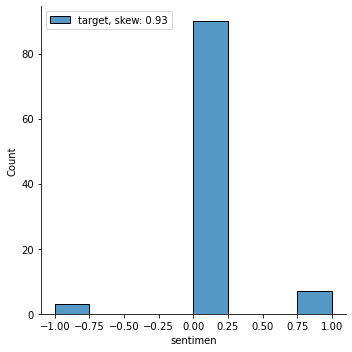

In [56]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

**Kesimpulan dataset: ??? **

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Emosi 

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
vectorizer = TfidfVectorizer()

In [59]:
positive_low_reviews = df_new[(df_new["sentimen"] == 1)]
negative_low_reviews = df_new[(df_new["sentimen"] == -1)]
positive_high_reviews = df_new[(df_new["sentimen"] == 2)]
negative_high_reviews = df_new[(df_new["sentimen"] == -2)]

### cek emosi positive low

In [60]:
positive_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
30,@radenrauf Ga bljar hanya main di sekolah hari...,1,user ga bljar hanya main di sekolah hari yg in...,"[user, ga, bljar, hanya, main, di, sekolah, ha...","[user, tidak, belajar, hanya, main, di, sekola...",user tidak belajar hanya main di sekolah hari ...,user ajar main sekolah hari indh bngt terus ma...
31,@radenrauf hari hari tertentu di bulan oktober...,1,user hari hari tertentu di bulan oktober jadi ...,"[user, hari, hari, tertentu, di, bulan, oktobe...","[user, hari, hari, tertentu, di, bulan, oktobe...",user hari hari tertentu di bulan oktober jadi ...,user hari hari tentu bulan oktober jadi octrou...
33,"@radenrauf Senin datang, dan kontrakan masih r...",1,user senin datang dan kontrakan masih ready ni...,"[user, senin, datang, dan, kontrakan, masih, r...","[user, senin, datang, dan, kontrakan, masih, r...",user senin datang dan kontrakan masih ready in...,user senin datang kontra ready yang minat dm y...
50,"valid, Oktober ku full senyum\n9/10 buat Oktob...",1,valid oktober ku full senyum number number bua...,"[valid, oktober, ku, full, senyum, number, num...","[valid, oktober, ku, penuh, senyum, number, nu...",valid oktober ku penuh senyum number number bu...,valid oktober ku penuh senyum number number bu...
69,"Banget, asli haha https://t.co/0tUOJHHvdR",1,banget asli haha co0tuojhhvdr,"[banget, asli, haha, co0tuojhhvdr]","[banget, asli, haha, co0tuojhhvdr]",banget asli haha co0tuojhhvdr,banget asli haha co0tuojhhvdr


In [61]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [62]:
Positive_1_tf_idf.shape

(7, 137)

In [63]:
!pip3 install wordcloud

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [65]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('user', 7.712317927548219)
('oktober', 7.529996370754264)
('banget', 7.019170746988274)
('haha', 7.019170746988274)
('hari', 7.019170746988274)
('ku', 7.019170746988274)
('main', 7.019170746988274)
('number', 7.019170746988274)
('oktober ku', 7.019170746988274)
('ready', 7.019170746988274)
('walaupun', 7.019170746988274)
('aaa', 6.613705638880109)
('aaa not', 6.613705638880109)
('ajaa', 6.613705638880109)
('ajaa ngelewatin', 6.613705638880109)
('ajar', 6.613705638880109)
('ajar main', 6.613705638880109)
('ampun', 6.613705638880109)
('ampun eh', 6.613705638880109)
('area', 6.613705638880109)
('area bagus', 6.613705638880109)
('asli', 6.613705638880109)
('asli haha', 6.613705638880109)
('bagus', 6.613705638880109)
('bagus pasar', 6.613705638880109)
('banget asli', 6.613705638880109)
('banget haha', 6.613705638880109)
('bareng', 6.613705638880109)
('bareng neng', 6.613705638880109)
('bi', 6.613705638880109)
('bi coxmobcuwlgt', 6.613705638880109)
('bngt', 6.613705638880109)
('bngt terus',

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: list index out of range

In [66]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

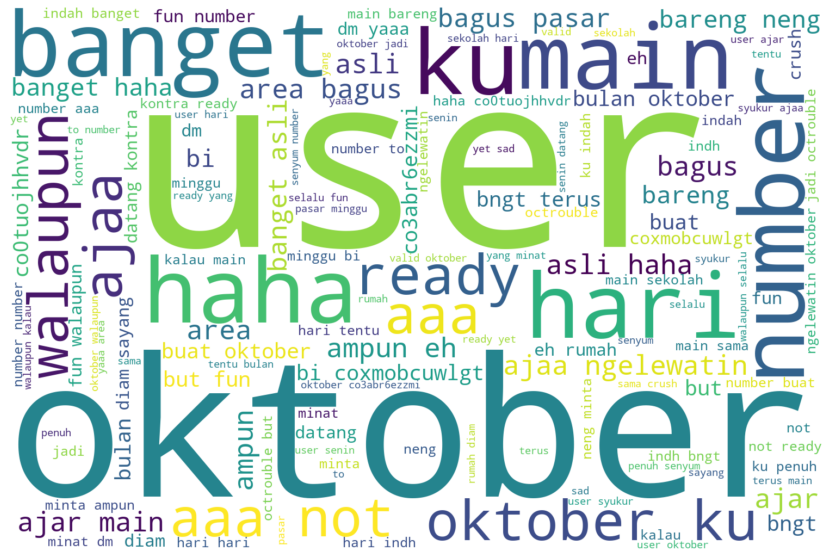

In [67]:
PlotWordCloud(d)

### cek emosi positive high

In [68]:
positive_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


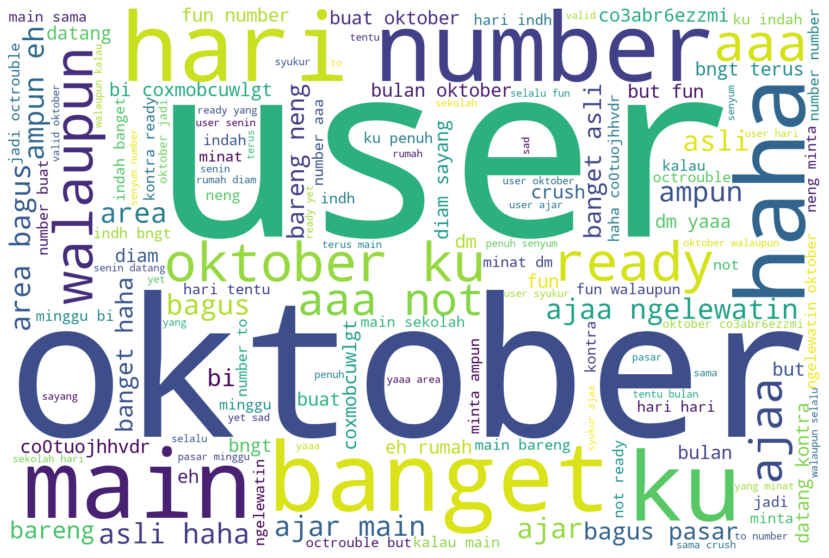

In [69]:
PlotWordCloud(d)

### cek emosi negative low

In [70]:
negative_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
38,@radenrauf Walaupun warnanya dark semua,-1,user walaupun warnanya dark semua,"[user, walaupun, warnanya, dark, semua]","[user, walaupun, warnanya, dark, semua]",user walaupun warnanya dark semua,user walaupun warna dark semua
82,@radenrauf berasa trouble nya😂,-1,user berasa trouble nya,"[user, berasa, trouble, nya]","[user, berasa, trouble, nya]",user berasa trouble nya,user asa trouble nya
86,@radenrauf makasih oktober yang flat flat aja,-1,user makasih oktober yang flat flat aja,"[user, makasih, oktober, yang, flat, flat, aja]","[user, makasih, oktober, yang, flat, flat, saja]",user makasih oktober yang flat flat saja,user makasih oktober flat flat


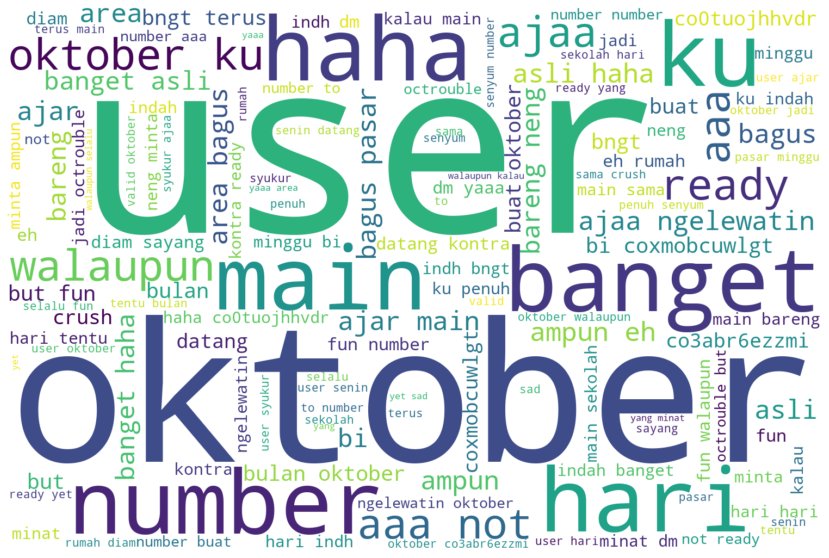

In [71]:
PlotWordCloud(d)

### cek emosi negative high

In [72]:
negative_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


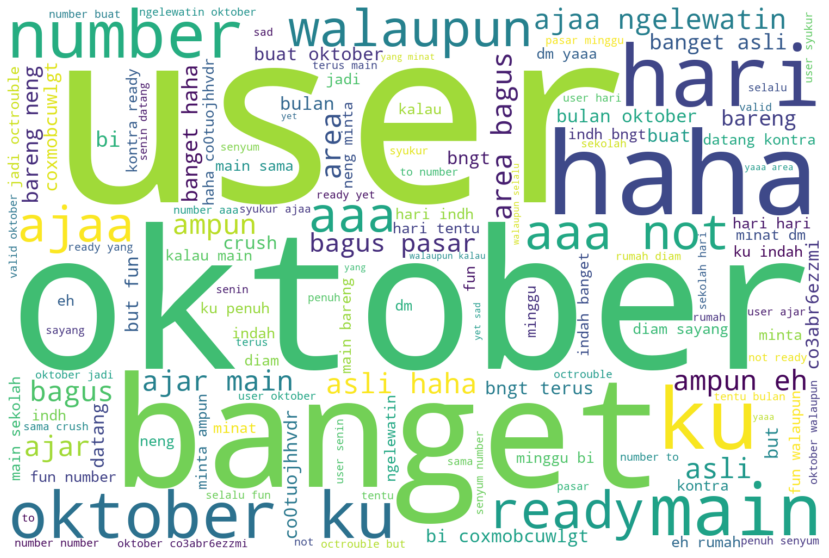

In [73]:
PlotWordCloud(d)

## Cek emosi untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [74]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [75]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [76]:
Data_TFIDF.shape

(100, 818)

## Training dan Testing dibagi menjadi 70 - 30

In [77]:
### Lengkapi kodenya
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [78]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [79]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model - Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [81]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [82]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [83]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [84]:
## Berapa nilai Accuracy Training set dan Test Set
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)


Accuracy Training set:  1.0
Accuracy Test set:  0.8333333333333334


In [85]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)


Recall Training set:  1.0
Recall Test set:  0.8333333333333334


In [86]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.6944444444444445


C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


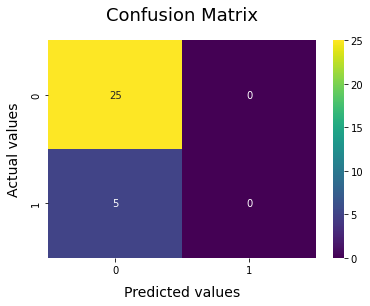

In [87]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [88]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [89]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.833333


In [90]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [91]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.833333,0.833333,0.694444


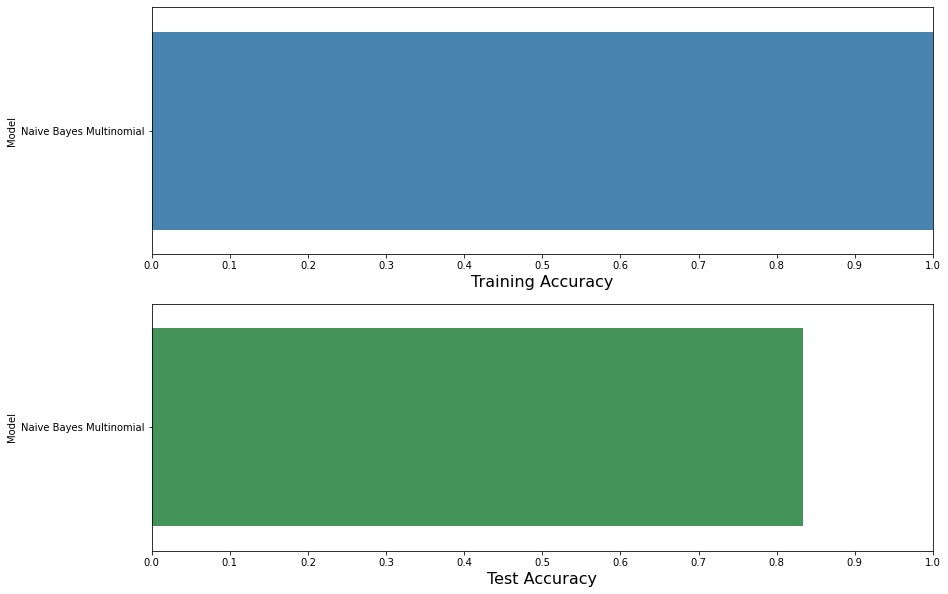

In [92]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Kesimpulan

Dari hasil pengujian setelah melakukan proses steming dan stopworld dapat dilihat bahwa niali training dan testing memiliki niali akurasi yang tinggi dimana untung training memiliki nilai akurasi sebanyak 1.0 sedangkan testing memiliki nilai akurasi 0.87